In [165]:
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
import yaml

def load_yaml_params(path):
    s = path.open('r').readlines()
    output = s[:7] + s[11:]
    output = '\n'.join(output)
    output = yaml.load(output)
    output['path'] = str(path)
    return output

def load_yaml(path):
    with path.open('r') as handle:
        return yaml.load(handle)
    
def calculate_speedup(duration):
    return 1 / (duration / duration.iloc[0])
    
    
def calculate_benchmark_stats(df):
    df = df.sort_values('num_replicas')
    df['speedup_train'] = calculate_speedup(df.total_duration_train)
    df['warmup_speedup_train'] = calculate_speedup(df.warmup_duration_train)
    df['post_duration_train'] = df.total_duration_train - df.warmup_duration_train
    df['post_speedup_train'] = calculate_speedup(df.post_duration_train)
    return df

plt.style.use('ggplot')

In [94]:
params = Path('/home/lhs18285/git/benchmarks/pearl/results/').glob('**/*params.yml')
results = Path('/home/lhs18285/git/benchmarks/pearl/results/').glob('**/*results.yml')

params = list(map(load_yaml_params, params))
results = list(map(load_yaml, results))

params_df = pd.DataFrame(params)

results_train_df = pd.DataFrame([r['train'] for r in results])
results_test_df = pd.DataFrame([r['test'] for r in results])
results_df = pd.merge(results_train_df, results_test_df, left_index=True, right_index=True, suffixes=['_train', '_test'])
results_df

bench_df = params_df.join(results_df)
bench_df['benchmark'] = bench_df['data_dir'].str.split('/').map(lambda x: x[-1])
bench_df

/home/lhs18285/miniconda3/envs/benchmarks/lib/python3.7/site-packages/ipykernel_launcher.py:9: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  if __name__ == '__main__':
/home/lhs18285/miniconda3/envs/benchmarks/lib/python3.7/site-packages/ipykernel_launcher.py:15: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  from ipykernel import kernelapp as app


,batch_size,data_dir,epochs,exec_mode,global_batch_size,learning_rate,lr_scaling,num_replicas,seed,use_amp,...,warmup_avg_ips_train,warmup_duration_train,accuracy,avg_ips_test,full_avg_ips_test,loss,total_duration_test,warmup_avg_ips_test,warmup_duration_test,benchmark
0,32,./data/dms_classifier,50,train_and_predict,32,0.0001,none,1,42,False,...,983.796759,37.222450,0.655707,790.439002,776.675431,1.315271,3.362177,673.448649,1.481990,dms_classifier
1,10,./data/em_denoise,30,train_and_predict,10,0.0100,none,1,42,False,...,444.785179,44.626315,NaN,1148.376420,1121.025284,0.009135,3.422643,236.671901,1.670711,em_denoise
2,8,./data/slstr_cloud,30,train_and_predict,8,0.0010,none,1,42,False,...,3.369848,534.032768,0.820439,10.691697,9.341223,0.603828,109.910362,1.463458,42.745056,slstr_cloud
3,32,./data/dms_classifier,50,train_and_predict,512,0.0001,none,16,42,False,...,830.876424,153.448237,0.684864,0.000000,1483.147516,0.694064,5.804625,1483.147516,0.000000,dms_classifier
4,10,./data/em_denoise,30,train_and_predict,160,0.0100,none,16,42,False,...,634.707087,174.250377,NaN,2382.173761,2190.818729,0.018169,8.771005,1967.571192,8.292069,em_denoise
5,8,./data/slstr_cloud,30,train_and_predict,128,0.0010,none,16,42,False,...,14.105347,584.012959,0.831284,0.000000,4.239103,1.625472,126.957909,4.239103,0.000000,slstr_cloud
6,32,./data/dms_classifier,50,train_and_predict,64,0.0001,none,2,42,False,...,913.138420,42.045418,0.709677,1034.520594,974.156404,0.833439,3.254006,772.942435,1.888529,dms_classifier
7,10,./data/em_denoise,30,train_and_predict,20,0.0100,none,2,42,False,...,592.376430,44.755198,NaN,1577.138671,1534.609635,6014.395060,3.362112,868.321405,2.127696,em_denoise
8,8,./data/slstr_cloud,30,train_and_predict,16,0.0010,none,2,42,False,...,5.430747,476.361416,0.821358,6.872295,5.560718,0.574500,114.093561,2.281773,52.602158,slstr_cloud
9,32,./data/dms_classifier,50,train_and_predict,128,0.0001,none,4,42,False,...,848.174888,54.255986,0.718983,822.399742,747.775958,0.699911,4.037168,660.714876,2.904454,dms_classifier


# SLSTR Benchmark

In [166]:
slstr_benchmark = bench_df.loc[bench_df['benchmark'] == 'slstr_cloud']
slstr_benchmark = calculate_benchmark_stats(slstr_benchmark)

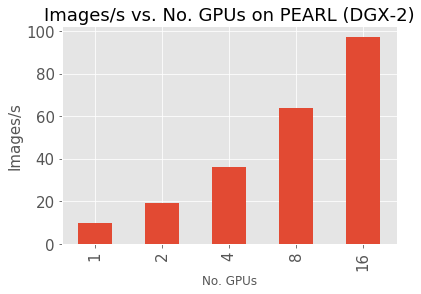

In [237]:
slstr_benchmark.plot(kind='bar', x='num_replicas', y=['avg_ips_train'], legend=False)
plt.xlabel('No. GPUs')
plt.ylabel('Images/s', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Images/s vs. No. GPUs on PEARL (DGX-2)', fontsize=18)
plt.savefig('imgs-gpus.png', dpi=300, bbox_inches='tight')

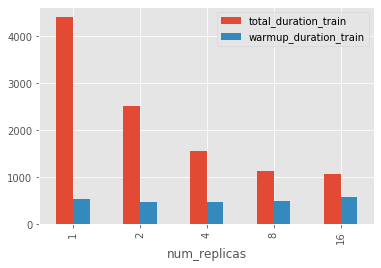

In [168]:
slstr_benchmark.plot(kind='bar', x='num_replicas', y=['total_duration_train', 'warmup_duration_train'])

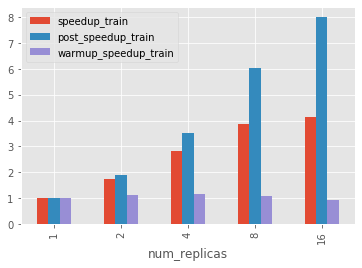

In [232]:
slstr_benchmark.plot(kind='bar', x='num_replicas', y=['speedup_train', 'post_speedup_train', 'warmup_speedup_train'])

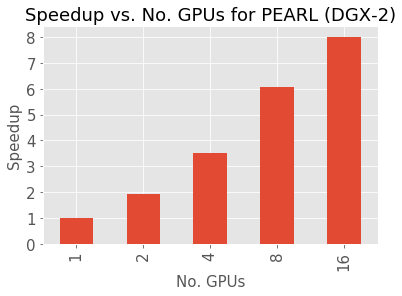

In [238]:
slstr_benchmark.plot(kind='bar', x='num_replicas', y=['post_speedup_train'], legend=False)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('No. GPUs', fontsize=15)
plt.ylabel('Speedup', fontsize=15)
plt.title('Speedup vs. No. GPUs for PEARL (DGX-2)', fontsize=18)
plt.savefig('speedup-gpus.png', dpi=300, bbox_inches='tight')

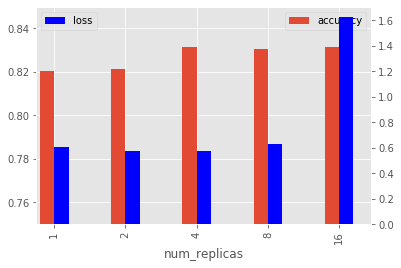

In [203]:
# ax = slstr_benchmark.plot(kind='bar', x='num_replicas', y=['accuracy', 'loss'], ylim=[.75, .9])

fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.
width=0.2
slstr_benchmark.plot(kind='bar', x='num_replicas', y='accuracy', ax=ax, width=width, position=1, ylim=[.75, .85])
slstr_benchmark.plot(kind='bar', x='num_replicas', y='loss', color='blue', ax=ax2, width=width, position=0)
ax2.grid(None)

# EM Denoise Benchmark

In [173]:
em_denoise_benchmark = bench_df.loc[bench_df['benchmark'] == 'em_denoise']
em_denoise_benchmark = calculate_benchmark_stats(em_denoise_benchmark)

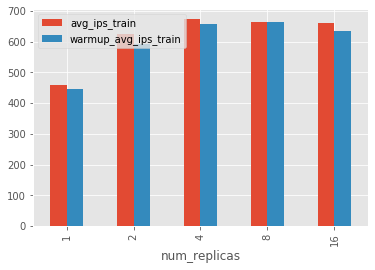

In [174]:
em_denoise_benchmark.plot(kind='bar', x='num_replicas', y=['avg_ips_train', 'warmup_avg_ips_train'])

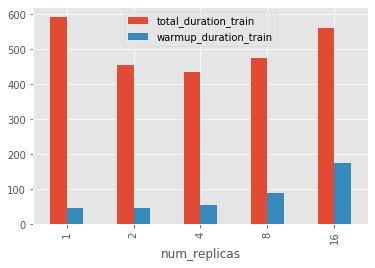

In [175]:
em_denoise_benchmark.plot(kind='bar', x='num_replicas', y=['total_duration_train', 'warmup_duration_train'])

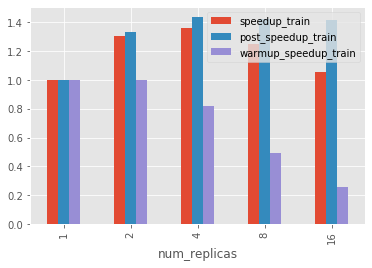

In [176]:
em_denoise_benchmark.plot(kind='bar', x='num_replicas', y=['speedup_train', 'post_speedup_train', 'warmup_speedup_train'])

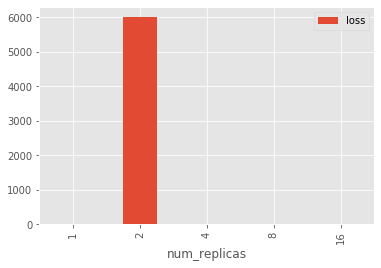

In [207]:
em_denoise_benchmark.plot(kind='bar', x='num_replicas', y='loss')

## DMS Classifier Benchmark

In [208]:
dms_classifier_benchmark = bench_df.loc[bench_df['benchmark'] == 'dms_classifier']
dms_classifier_benchmark = calculate_benchmark_stats(dms_classifier_benchmark)

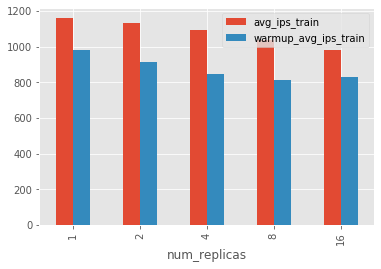

In [209]:
dms_classifier_benchmark.plot(kind='bar', x='num_replicas', y=['avg_ips_train', 'warmup_avg_ips_train'])

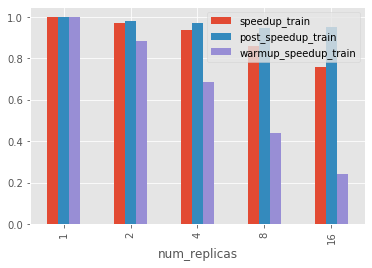

In [216]:
dms_classifier_benchmark.plot(kind='bar', x='num_replicas', y=['speedup_train', 'post_speedup_train', 'warmup_speedup_train'])

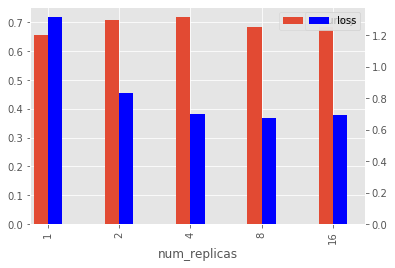

In [215]:
# ax = slstr_benchmark.plot(kind='bar', x='num_replicas', y=['accuracy', 'loss'], ylim=[.75, .9])

fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.
width=0.2
dms_classifier_benchmark.plot(kind='bar', x='num_replicas', y='accuracy', ax=ax, width=width, position=1)
dms_classifier_benchmark.plot(kind='bar', x='num_replicas', y='loss', color='blue', ax=ax2, width=width, position=0)
ax2.grid(None)